<a href="https://colab.research.google.com/github/rakshan-bhat/Digit_recognition/blob/main/Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##import the libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# fetch the dataset
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
## check the dataset
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",x_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000, 28, 28)


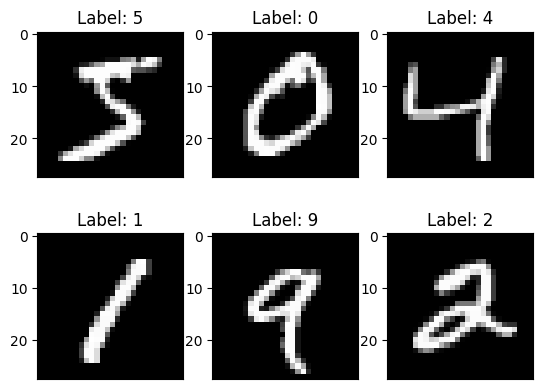

In [ ]:
#lets plot the images
fig=plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none') ## image
  plt.title(f"Label: {y_train[i]}")
  plt.xticks([])
fig.show();

## Lets take a look at a single image data
NUM = 0

print(f"Label: {y_train[NUM]}")
print("Shape: ", x_train[NUM].shape)
print("*"*50)
digit = x_train[NUM]
print(digit)

#Prettify the print
for i in digit:
    print(*i, sep=" ")

In [ ]:
x_train = x_train.reshape(60000, 784) # flatten training data
x_test = x_test.reshape(10000, 784) # flatten test data


In [ ]:
## change the data type to float
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [ ]:

## normalize / scale the image data
x_train /= 255
x_test /= 255


In [ ]:
## check the data after processing
print(x_train.shape, x_test.shape)

print(max(x_train[0]), max(x_test[0]))

(60000, 784) (10000, 784)
1.0 1.0


In [ ]:
NUM_CLASSES = 10

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [ ]:
print(y_train.shape, y_train[0])
print(y_test.shape, y_test[0])

(60000, 10) [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10) [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
## importing the relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
## create the model instance

model = Sequential()

In [ ]:
## add first layer

model.add(Dense(256, input_shape=(784,)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## add activation layer
model.add(Activation('relu'))

In [ ]:
## add second layer along with activation
model.add(Dense(256, activation="relu"))

In [ ]:
## add the last layer
model.add(Dense(10, activation="softmax"))

In [ ]:
## lets get an overview of the network we put together so far
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## compiling the model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

## Lets first confirm that GPU is available :)
!nvidia-smi

Wed Nov 27 00:42:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              26W /  70W |    111MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:

import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128

In [ ]:
history = model.fit(x=x_train,  ## training images
    y=y_train,  ## training labels
    epochs=EPOCHS,  ## number of epochs
    batch_size=BATCH_SIZE,  ## define the batch size
    shuffle=True,   ## lets shuffle the inputs
    validation_split=0.2 ## 20% training data will be used as validation data
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5583 - loss: 1.7247 - val_accuracy: 0.8510 - val_loss: 0.6475
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8501 - loss: 0.5982 - val_accuracy: 0.8903 - val_loss: 0.4232
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.4300 - val_accuracy: 0.9032 - val_loss: 0.3560
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9002 - loss: 0.3636 - val_accuracy: 0.9112 - val_loss: 0.3222
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.3336 - val_accuracy: 0.9141 - val_loss: 0.3012
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.3055 - val_accuracy: 0.9196 - val_loss: 0.2857
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9162 - loss: 0.2910 - val_accuracy: 0.9236 - val_loss: 0.2712
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - loss: 0.2786 - val_accuracy: 0.

In [ ]:

## check out the result
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
for i in history.history.keys():
  print(history.history[i])

[0.7044583559036255, 0.8629583120346069, 0.8895624876022339, 0.9001041650772095, 0.9080625176429749, 0.9128541946411133, 0.9173333048820496, 0.9208750128746033, 0.9246666431427002, 0.9274791479110718]
[1.2821033000946045, 0.5395155549049377, 0.4100622534751892, 0.35823163390159607, 0.3281821608543396, 0.30698633193969727, 0.29042762517929077, 0.2767871618270874, 0.26463937759399414, 0.254156231880188]
[0.8510000109672546, 0.890333354473114, 0.903166651725769, 0.9111666679382324, 0.9140833616256714, 0.9195833206176758, 0.9235833287239075, 0.9264166951179504, 0.9294999837875366, 0.9314166903495789]
[0.6474505662918091, 0.4231571555137634, 0.3560155928134918, 0.3222110867500305, 0.3011922538280487, 0.2857263684272766, 0.2712041437625885, 0.260588139295578, 0.25029826164245605, 0.24154536426067352]


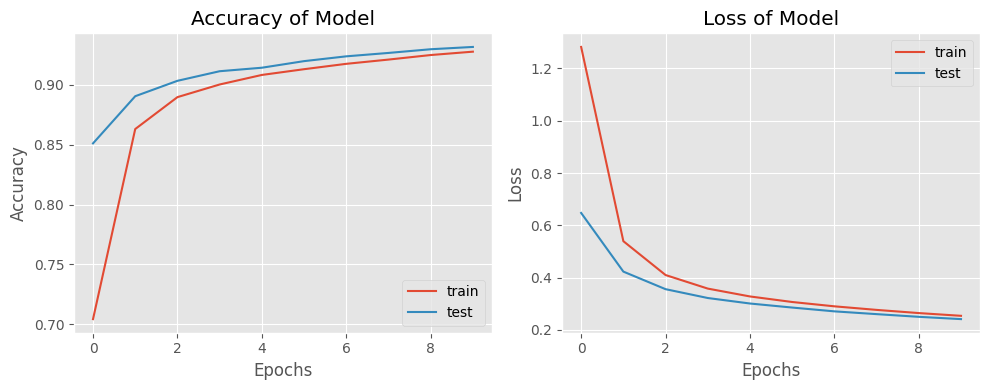

In [ ]:
plt.style.use('ggplot') ## use ggplot style sheet. Its just prettier :)
def plot_history(history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();
plot_history(history)


In [ ]:
## lets create a folder to save the model
!mkdir -p models


## lets save the whole model as hdf5 file
model.save("models/model_basic_v1.h5")


## check saved model
!ls models


model_basic_v1.h5


In [ ]:
## load saved model
model_loaded = tf.keras.models.load_model("models/model_basic_v1.h5")


model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,324 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:

## lets serialize and save the model architecture and weights separately
## we will use that in next section
model_json = model.to_json()

with open("models/model_arch_v1.json", "w") as json_file:
  json_file.write(model_json)

## serialize and save weights to HDF5
model.save_weights("models/model_weights_v1.weights.h5")



!ls models

model_arch_v1.json  model_basic_v1.h5  model_weights_v1.weights.h5


In [ ]:
## lets load the model architecture so we can train new model from scratch
with open('models/model_arch_v1.json', 'r') as json_file:
  model_v2_json = json_file.read()

model_v2 = tf.keras.models.model_from_json(model_v2_json)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,324 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
## import callbacks from keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger


## early stopping callback
earlystop = EarlyStopping(
    patience=3,
    monitor='val_loss',
    mode='min',
    verbose=1
)




checkpoint = ModelCheckpoint(
    filepath="models/model_best_v3.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)


## csvlogger callback
!mkdir -p csvlogs

cvslogs = CSVLogger(
    filename="csvlogs/training_log_v3.log"
)


callbacks = [earlystop, checkpoint, cvslogs]

In [ ]:
from tensorflow.keras.optimizers import SGD


optimizer = SGD(learning_rate=0.001)


## model compile
model_v2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


## train the model with callbacks
history2 = model_v2.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10
354/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1455 - loss: 2.2833
Epoch 1: val_loss improved from inf to 2.10324, saving model to models/model_best_v3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1500 - loss: 2.2797 - val_accuracy: 0.4157 - val_loss: 2.1032
Epoch 2/10
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 2.0572
Epoch 2: val_loss improved from 2.10324 to 1.88919, saving model to models/model_best_v3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4747 - loss: 2.0554 - val_accuracy: 0.6249 - val_loss: 1.8892
Epoch 3/10
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 1.8464
Epoch 3: val_loss improved from 1.88919 to 1.66663, saving model to models/model_best_v3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6284 - loss: 1.8445 - val_accuracy: 0.6998 - val_loss: 1.6666
Epoch 4/10
359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 1.6259
Epoch 4: val_loss improv

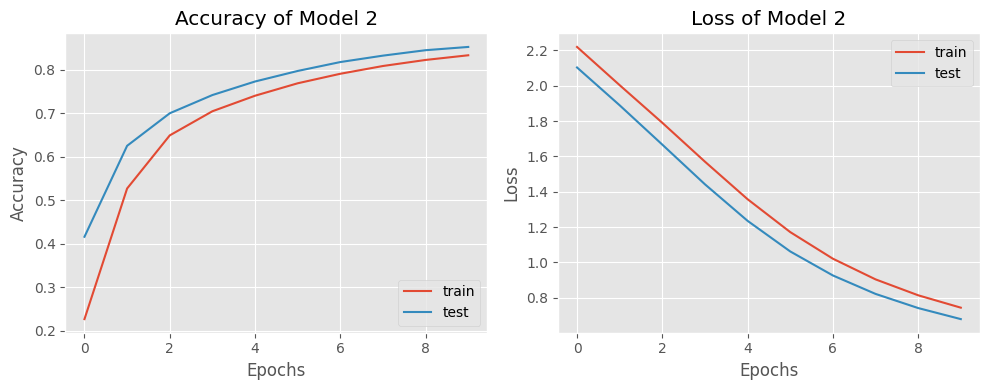

In [ ]:
fig = plt.figure(figsize=(10, 4))
## accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy of Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

## loss plot
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss of Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig.show();

In [ ]:
import numpy as np
## lets start withmaking a few prediction
SAMPLES = 6 # test 6 samples from x_test



# Use model.predict() to get probabilities or logits
predictions = model_v2.predict(x_test[:SAMPLES])

# Convert probabilities/logits to class indices
prediction_classes = np.argmax(predictions, axis=1)


print(predictions)
print(predictions.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.30017148e-02 4.00254782e-03 9.56110191e-03 9.93032288e-03
  1.42243402e-02 7.95708317e-03 3.26540903e-03 8.63731623e-01
  9.04573221e-03 6.52801171e-02]
 [7.60529488e-02 6.10945821e-02 2.60226488e-01 2.17010140e-01
  4.50518448e-03 1.45604849e-01 1.77798271e-01 2.54409830e-03
  5.19725420e-02 3.19088763e-03]
 [1.01908222e-02 7.37678111e-01 6.22176379e-02 4.24271300e-02
  8.14956333e-03 2.48804539e-02 2.88159158e-02 2.40427777e-02
  4.24099602e-02 1.91875827e-02]
 [8.97034645e-01 2.38890949e-04 1.36459293e-02 5.99355623e-03
  2.10157619e-03 2.64976174e-02 3.44395600e-02 1.39428815e-02
  4.62603662e-03 1.47927890e-03]
 [1.17794583e-02 3.78418714e-03 5.05040921e-02 9.01447982e-03
  5.99942565e-01 3.87078822e-02 2.77360622e-02 4.78157289e-02
  2.41586175e-02 1.86556995e-01]
 [4.93586389e-03 8.01335692e-01 5.60607277e-02 3.41218188e-02
  5.58905955e-03 1.46966539e-02 1.15598692e-02 1.72036048e-02
  4.15104181e-02 1.29861506e-02]]
[[0.01 0.   0.01 0.

In [ ]:

prediction_classes = np.argmax(predictions, axis=-1)
print(prediction_classes)


[7 2 1 0 4 1]


In [ ]:

## now lets check the actual labels from y_test
print(y_test[:SAMPLES])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:

## extract the labels classes from y_test
actual_classes = np.argmax(y_test[:SAMPLES], axis=-1)
print(actual_classes)

[7 2 1 0 4 1]


In [ ]:
score = model_v2.evaluate(x_test, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8253 - loss: 0.7494


In [ ]:
score

{'accuracy': 0.8460000157356262, 'loss': 0.6856482625007629}

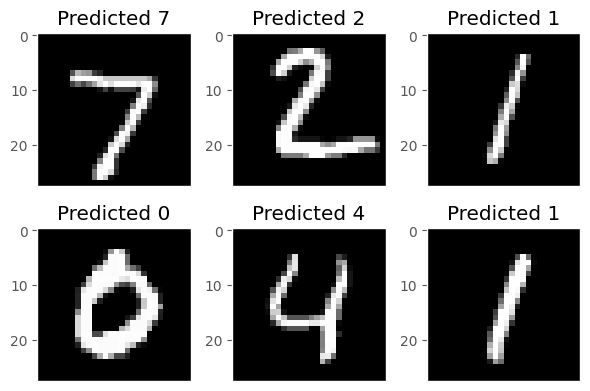

In [ ]:

def show_images(samples, predicted):
  fig = plt.figure(figsize=(6, 6))
  for i, image in enumerate(samples):
    plt.subplot(3, 3, i+1)
    image = image.reshape(28, 28) * 255
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted[i]}")
    plt.grid(False)
    plt.xticks([])

  plt.tight_layout()
  fig.show();


show_images(x_test[:SAMPLES], prediction_classes)